In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        #how many layers?
        #input layer(4 features) --> h1 N --> h2 N --> output(3 classes) 
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [4]:
torch.manual_seed(32)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./PYTORCH_NOTEBOOKS/Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


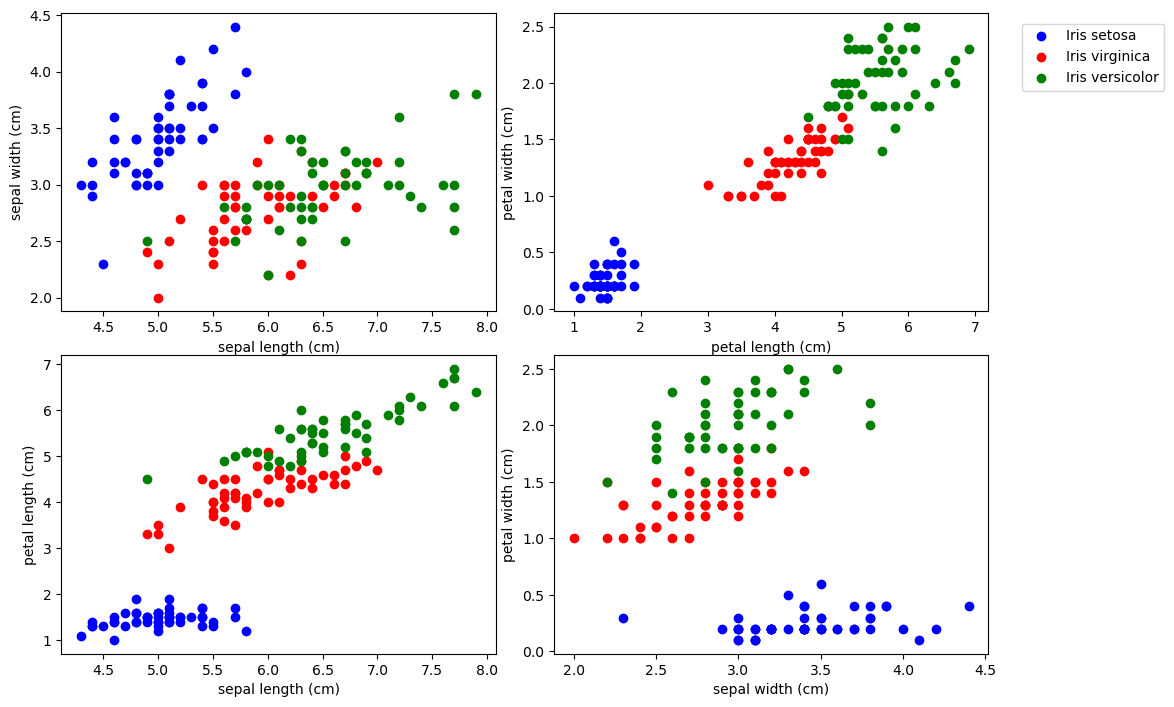

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [9]:
X = df.drop('target', axis=1)
y = df['target']

In [10]:
X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=33)

In [13]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [14]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [16]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [17]:
epochs = 100
losses = []

for i in range(epochs):
    #forward and get a prediction
    y_pred = model.forward(X_train)
    
    #calculate loss/error
    loss = criterion(y_pred, y_train)
    
    losses.append(loss.detach().numpy())
    
    if i%10 == 0:
        print(f'Epoch {i} and loss is: {loss}')
        
    #backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.156490683555603
Epoch 10 and loss is: 0.9443289637565613
Epoch 20 and loss is: 0.7813014984130859
Epoch 30 and loss is: 0.6114458441734314
Epoch 40 and loss is: 0.4065765142440796
Epoch 50 and loss is: 0.26408103108406067
Epoch 60 and loss is: 0.15899421274662018
Epoch 70 and loss is: 0.10569368302822113
Epoch 80 and loss is: 0.08359698206186295
Epoch 90 and loss is: 0.07355079054832458


Text(0.5, 0, 'Epoch')

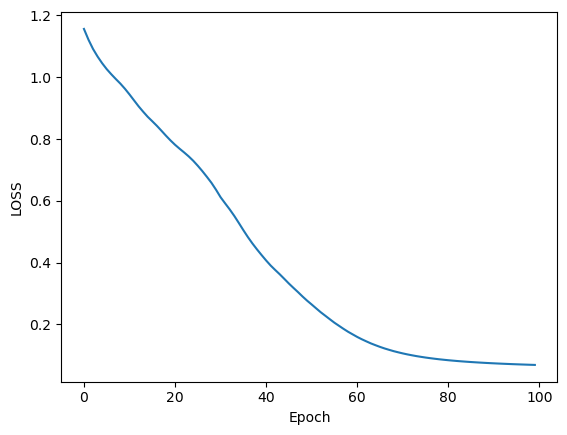

In [18]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [20]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [21]:
loss

tensor(0.0501)

In [27]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        print(f'Data {i + 1}.) {y_val.argmax().item()} {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1 

print(f'we got {correct} correct!')

Data 1.) 1 1
Data 2.) 1 1
Data 3.) 0 0
Data 4.) 1 1
Data 5.) 2 2
Data 6.) 2 2
Data 7.) 0 0
Data 8.) 0 0
Data 9.) 2 2
Data 10.) 2 2
Data 11.) 2 2
Data 12.) 0 0
Data 13.) 2 2
Data 14.) 1 1
Data 15.) 2 2
Data 16.) 1 1
Data 17.) 2 2
Data 18.) 0 0
Data 19.) 1 1
Data 20.) 2 2
we got 20 correct!


In [28]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [29]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [30]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [31]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

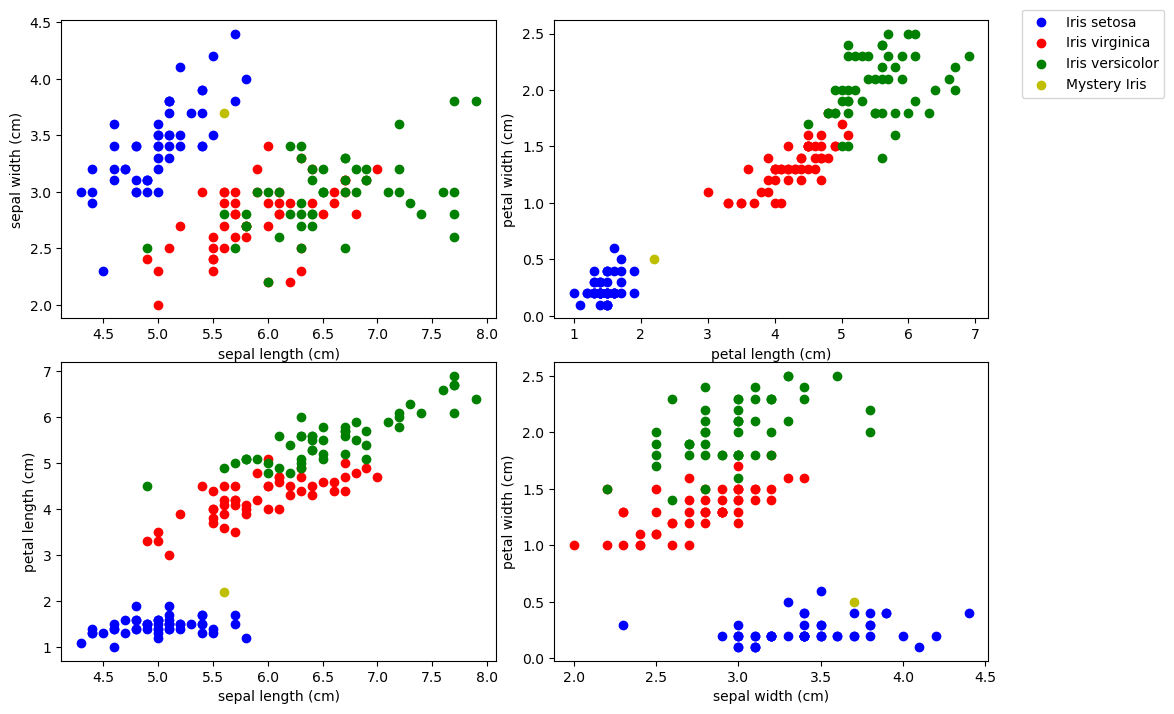

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g', 'y']
labels = ['Iris setosa','Iris virginica','Iris versicolor', 'Mystery Iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
    
    # add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [35]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  6.1490,   1.7307, -10.3919])
tensor(0)
